## 관련자료

참고자료 : https://www.etoday.co.kr/news/view/2082566

## 데이터 분석에 들어가기 전에 생각해야 할 부분

- 각 데이터마다 특성이 있다.
- 지금 해야할 부분은 이러한 특성을 가진 설문조사를 한 사람이 컨텐츠를 사용할 것인가?

- 각 코드들이 무엇을 뜻하는지 알 수는 없다.
- 세분류, 소분류, 중분류, 대분류를 어떻게 처리할 것인가?

In [130]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [131]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/test.csv')

D_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_D_코드.csv', index_col = 0).T.to_dict()
H_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_H_코드.csv', index_col = 0).T.to_dict()
L_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_L_코드.csv', index_col = 0).T.to_dict()

In [132]:
# 이렇게 사용할 수 있는 부분은 배워가도록 하자~
D_code

{4: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 4, '속성 D 소분류코드': 3, '속성 D 중분류코드': 2},
 5: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 5, '속성 D 소분류코드': 3, '속성 D 중분류코드': 2},
 7: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 7, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 8: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 9: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 10: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 11: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 12: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 13: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 14: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 14, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 15: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 15, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 17: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 17, '속성 D 소분류코드': 16, '속성 D 중분류코드': 2},
 18: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 18, '속성 D 소분류코드': 16, '속성 D 중분류코드': 2},
 19: {'속성 D 대분류코드': 1, '

In [133]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [134]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


코드를 그대로 사용했습니다 : https://www.dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent

In [135]:
# 관련 코드들을 한번에 모델 돌리기 위해서
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])

    drop_column = ['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','contents_attribute_d','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_h','contents_attribute_l']

    for i in drop_column:
        df = df.drop(i, axis = 1)
    return df

train_data = add_code(train, D_code, H_code, L_code)
test_data = add_code(test, D_code, H_code, L_code)

print(train_data.shape)
print(test_data.shape)

(501951, 54)
(46404, 53)


In [136]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_e,person_prefer_f,person_prefer_g,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_m,contents_attribute_e,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,8,1,1,3,3,10,2,1,2,1,4,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,4,1,1,1,3,5,1,1,2,1,4,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,3,1,1,3,1,10,2,1,1,1,4,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,3,1,1,1,3,5,1,1,2,5,3,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,4,1,1,1,1,10,2,1,2,1,4,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


In [137]:
test_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_e,person_prefer_f,person_prefer_g,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_m,contents_attribute_e,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,1,4,1,1,1,3,10,2,1,2,1,5,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,2,2,1,1,1,3,5,1,1,2,1,4,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,1,0,1,1,3,3,3,1,1,2,3,4,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,5,4,1,1,3,3,5,1,1,2,5,3,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,5,5,1,1,3,1,5,1,1,1,1,4,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009


## EDA

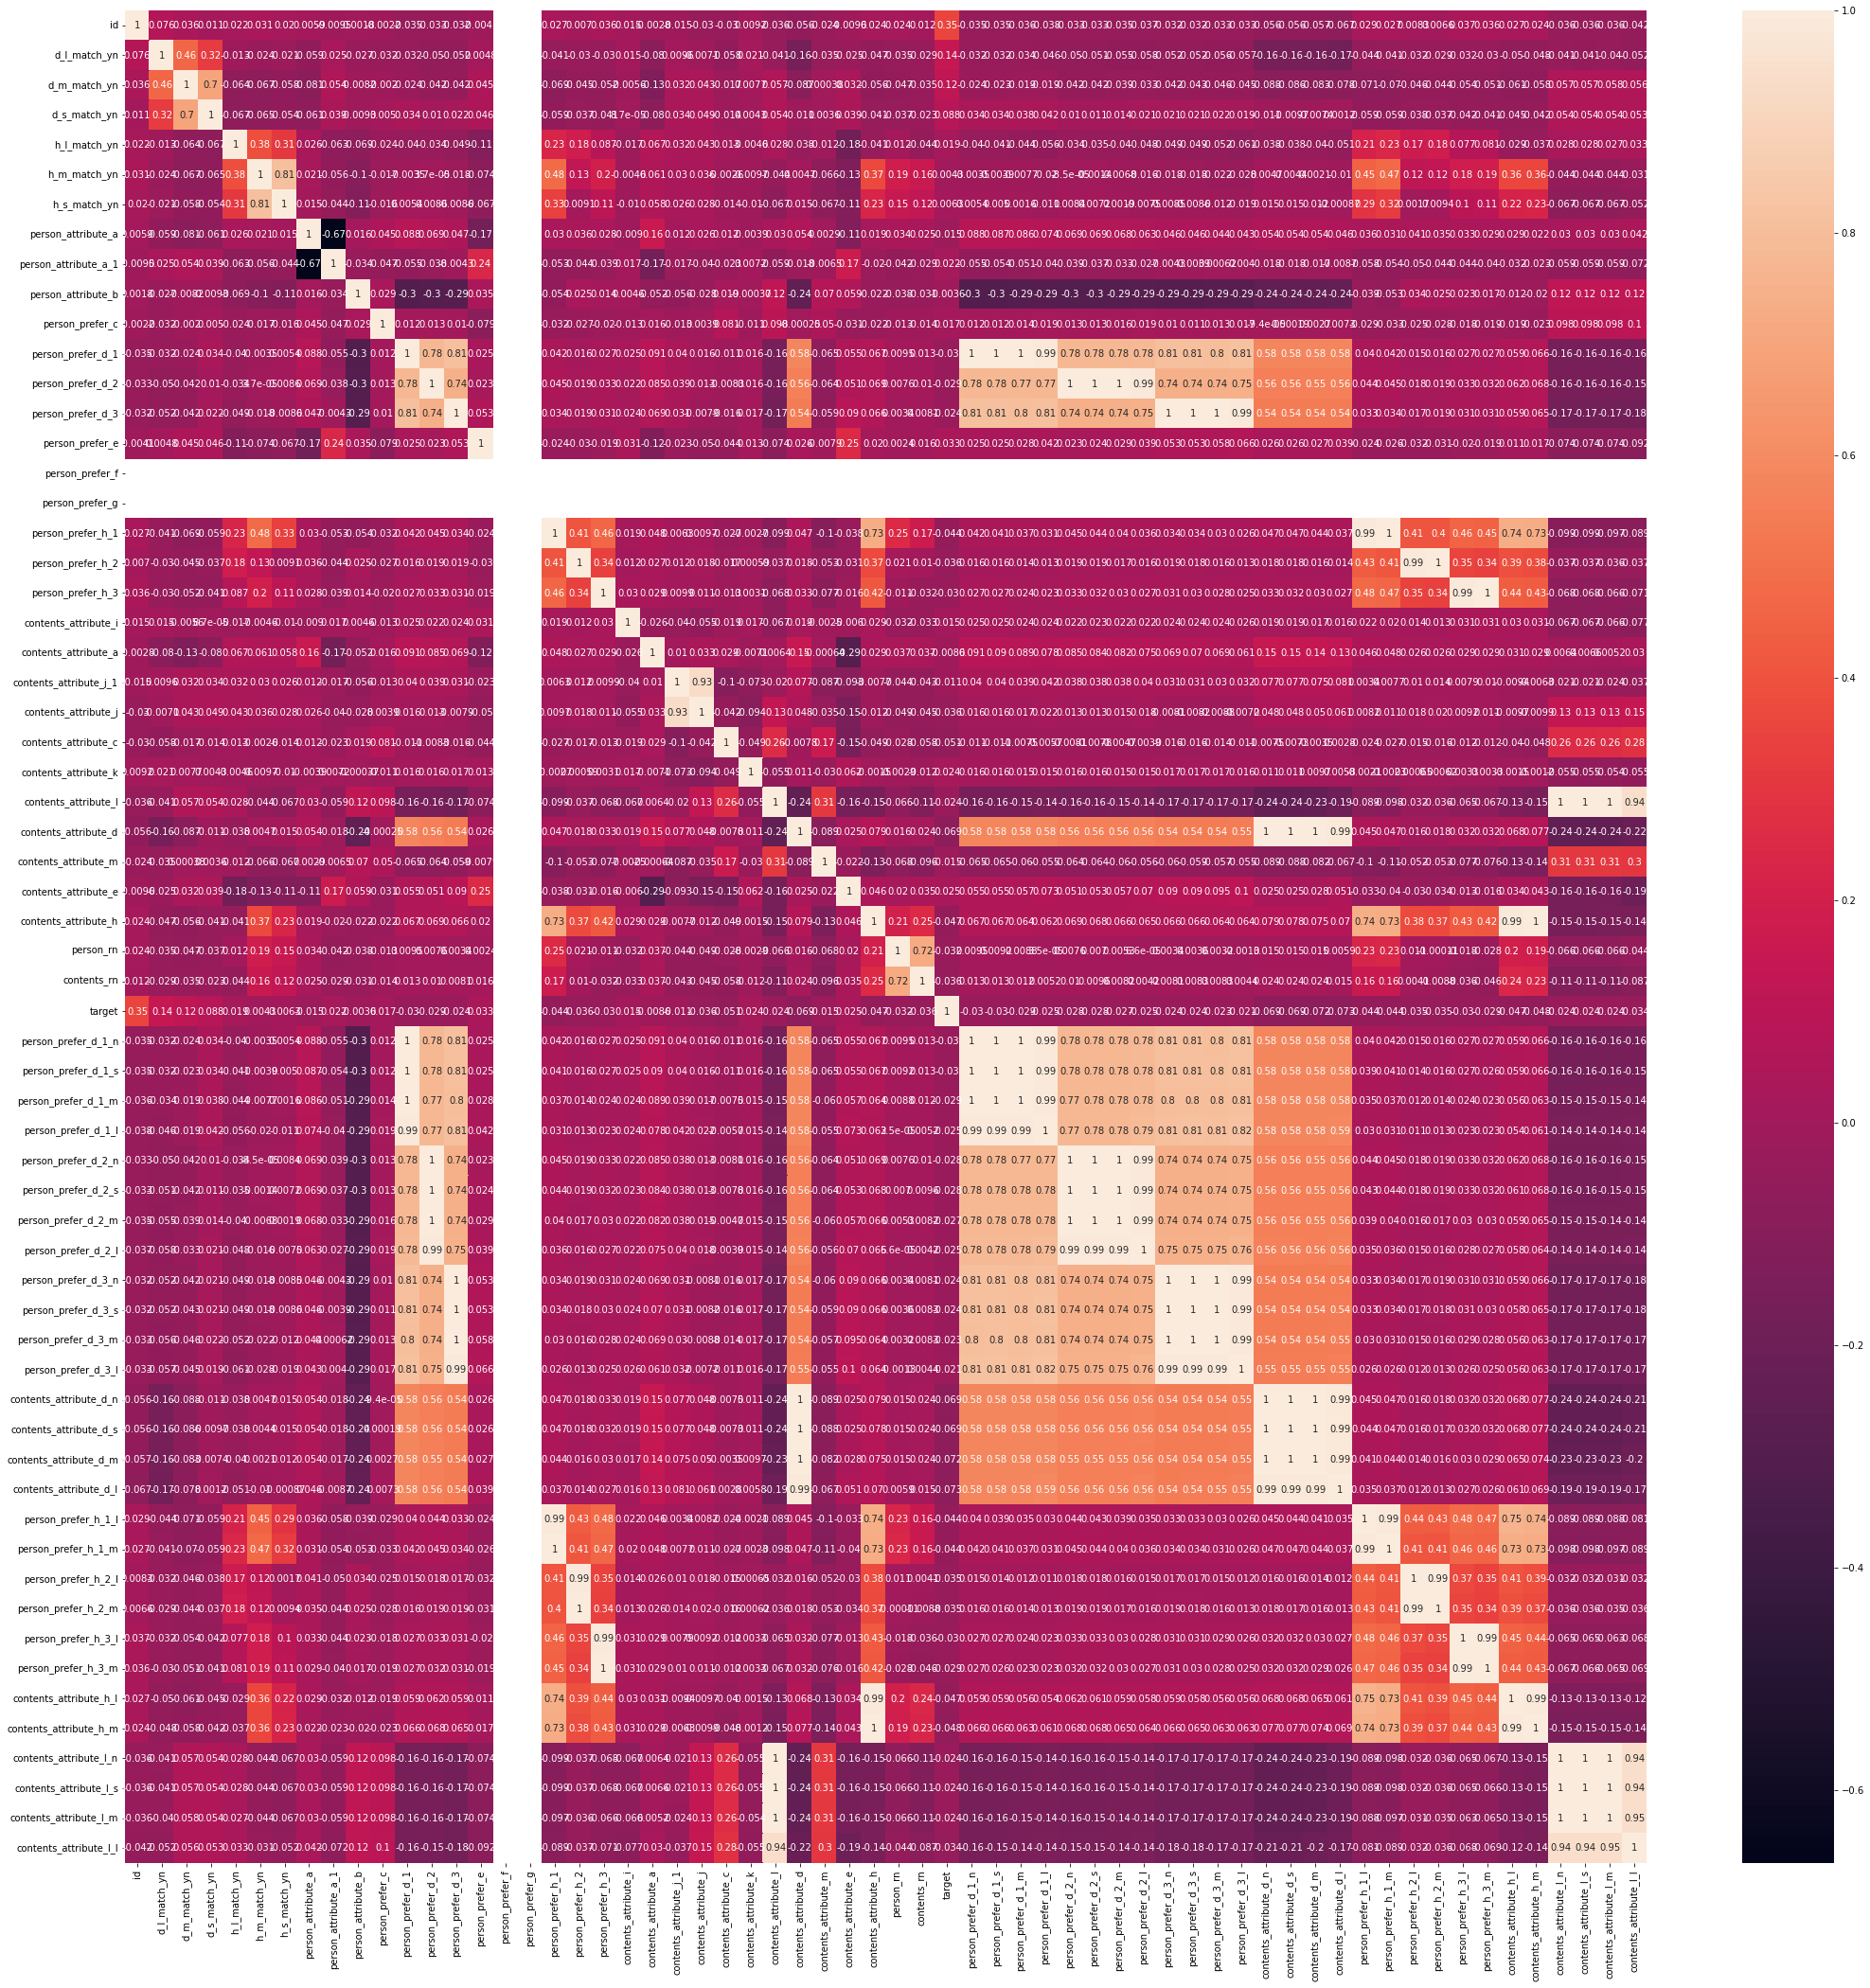

In [138]:
plt.figure(figsize = (36,36))
sns.heatmap(train.corr(), annot = True)

### A의 속성

Text(0.5, 1.0, 'Test A attribute')

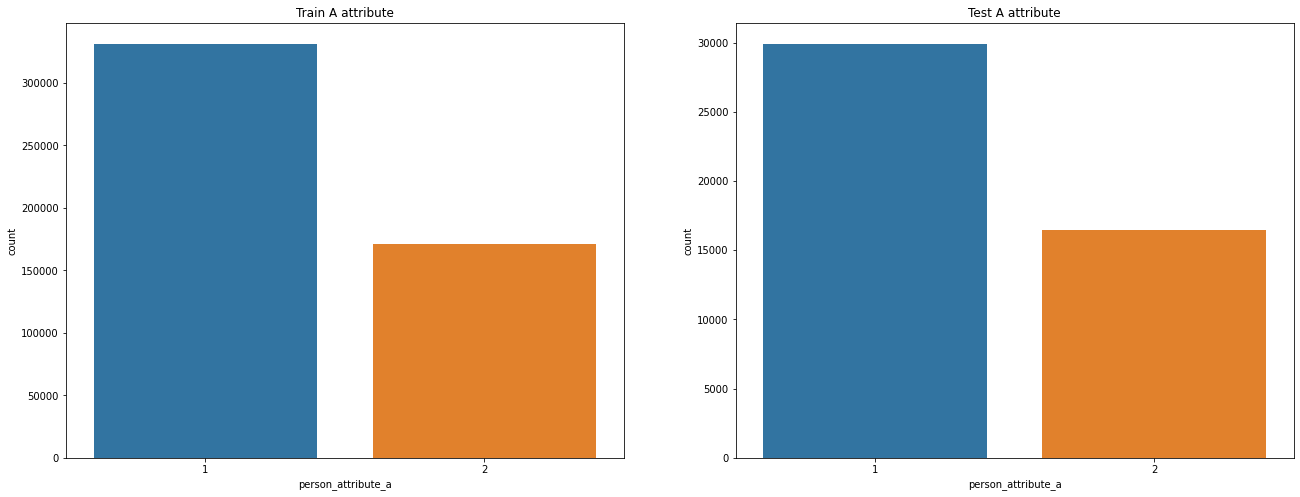

In [139]:
# A속성의 분포를 확인해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (22,8))

sns.countplot(train['person_attribute_a'], ax = ax[0])
sns.countplot(test['person_attribute_a'], ax = ax[1])

ax[0].set_title('Train A attribute')
ax[1].set_title('Test A attribute')

Text(0.5, 1.0, 'Test A_1 attribute')

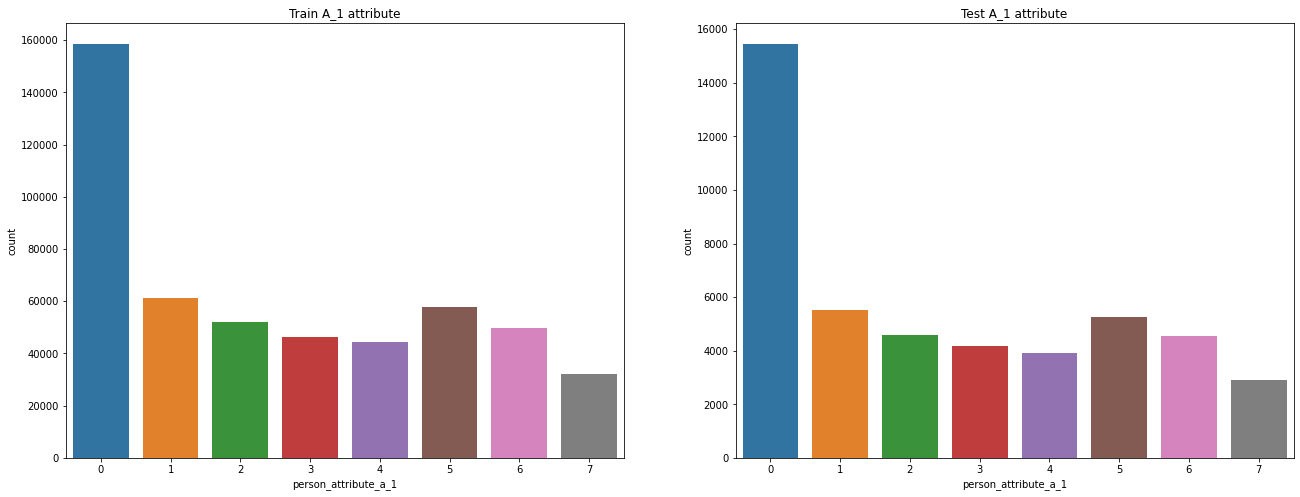

In [140]:
# A_1의 속성을 그래프로 확인해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (22,8))

sns.countplot(train['person_attribute_a_1'], ax = ax[0])
sns.countplot(test['person_attribute_a_1'], ax = ax[1])

ax[0].set_title('Train A_1 attribute')
ax[1].set_title('Test A_1 attribute')

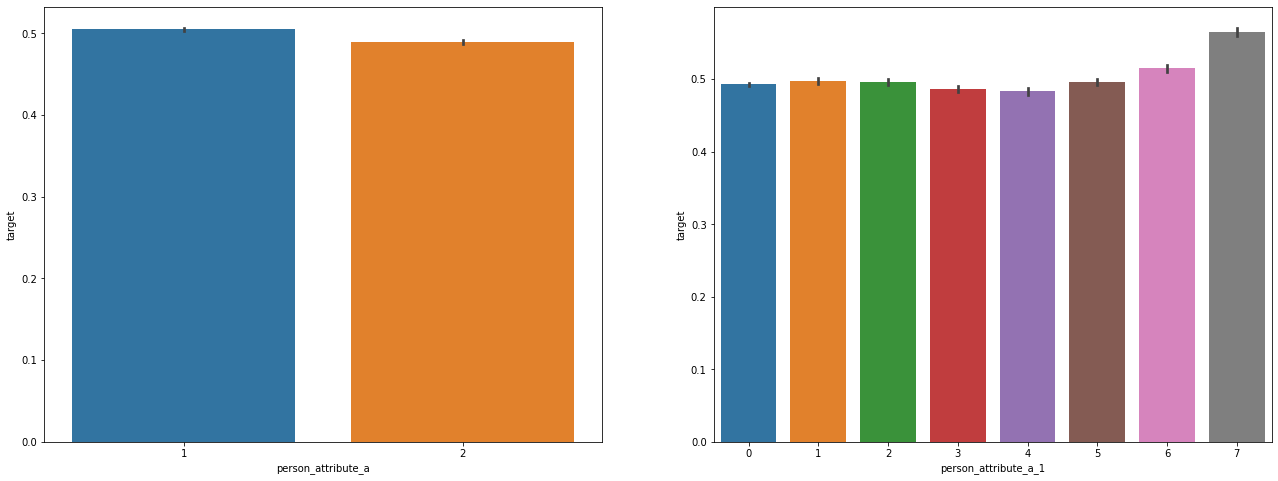

In [141]:
# 1과 2를 기준으로 person_attribute_a_1의 특성을 확인해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (22,8))
sns.barplot(data = train, x = 'person_attribute_a', y = 'target', ax = ax[0])
sns.barplot(data = train, x = 'person_attribute_a_1', y = 'target', ax = ax[1])

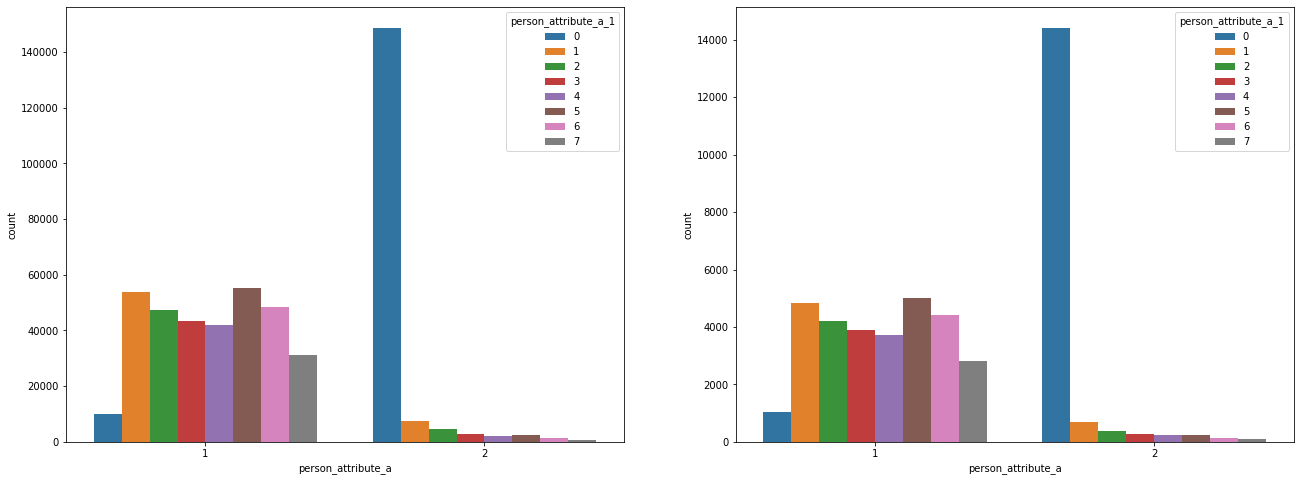

In [142]:
# 비슷한 분포를 띄고 있다.
fig, ax = plt.subplots(ncols = 2, figsize = (22,8))
sns.countplot(data = train, x = 'person_attribute_a', hue = 'person_attribute_a_1', ax = ax[0])
sns.countplot(data = test, x = 'person_attribute_a', hue = 'person_attribute_a_1', ax = ax[1])

# 생각을 적어보자면... a_1의 데이터 특성은 a의 데이터에서 2의 특성을 띄고 있다.
# 이 부분을 어떻게 생각해야 할 지 모르겠다.

### B의 특성

Text(0.5, 1.0, 'Test B attribute')

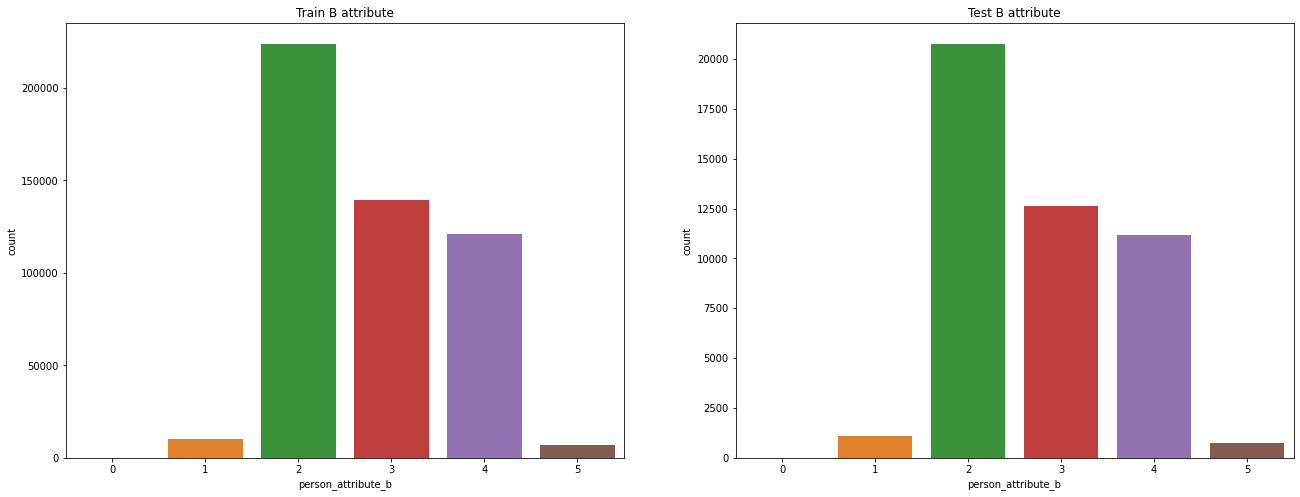

In [143]:
# B속성의 분포를 확인해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (22,8))

sns.countplot(train['person_attribute_b'], ax = ax[0])
sns.countplot(test['person_attribute_b'], ax = ax[1])

ax[0].set_title('Train B attribute')
ax[1].set_title('Test B attribute')

In [ ]:
# 이 부분이 과연 관련이 있는 데이터 일까?
plt.figure(figsize = (22,8))
sns.barplot(data = train, x = 'person_attribute_b', y = 'target')

### C의 속성

In [ ]:
# C속성의 분포를 확인해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (22,8))

sns.countplot(train['person_prefer_c'], ax = ax[0])
sns.countplot(test['person_prefer_c'], ax = ax[1])

ax[0].set_title('Train C attribute')
ax[1].set_title('Test C attribute')

In [ ]:
plt.figure(figsize = (22,8))
sns.barplot(data = train, x = 'person_prefer_c', y = 'target')

### D의 속성

In [ ]:
# D_1속성의 분포를 확인해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (22,8))

sns.countplot(train['person_prefer_d_1'], ax = ax[0])
sns.countplot(test['person_prefer_d_1'], ax = ax[1])

ax[0].set_title('Train D_1 attribute')
ax[1].set_title('Test D_1 attribute')

### F와 G의 속성

In [ ]:
# 전부 지워주도록 하자.
print(train['person_prefer_f'].unique())
print(test['person_prefer_f'].unique())

print(train['person_prefer_g'].unique())
print(test['person_prefer_g'].unique())

## 필요가 없다고 생각되는 번호들 먼저 제거하고 다시 시작해보도록 하자.

In [ ]:
train_data.columns

In [ ]:
drop_columns = ['contents_open_dt','contents_rn','person_rn','id','person_prefer_f', 'person_prefer_g']

train_data = train_data.drop(drop_columns, axis = 1)
test_data = test_data.drop(drop_columns, axis = 1)

In [ ]:
train_data

In [ ]:
train_data

## Modeling

In [ ]:
#LGBM 사용해서 만들어 보기

from lightgbm import LGBMClassifier

X_train, y_train = train_data.drop('target', axis = 1), train_data['target']
X_test = test_data

model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

submission = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv')

In [ ]:
submission['target'] = y_pred

submission.to_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv', index = False)